In [1]:

from IPython.display import display, Markdown, Latex
h1 = lambda x: display(Markdown('# '+str(x)))
h3 = lambda x: display(Markdown('### '+str(x)))
h4 = lambda x: display(Markdown('#### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
h5 = lambda x: display(Markdown('##### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
bl = lambda x: display(Markdown('##### <font color="blue"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd = lambda x: display(Markdown('##### <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd1 = lambda x: display(Markdown('# <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
gra = lambda x: display(Markdown('##### <font color="gray"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
itc = lambda x: display(Markdown('***'+str(x.strip()) + '***' ))
pl = lambda: print('\n'+'#'*100 + '\n')
pl2 = lambda: print('\n'+'='*100 + '\n')
pls = lambda: print('\n'+'#'*50 +' Start '+'#'*50 + '\n')
pn = lambda x=5: print('\n'*x)


## Hand Made Neural Network

https://144.34.140.210:8579/notebooks/Git_Qiliang/ML_ANN_Gradiant_Decent/Backpropagation.ipynb

In [2]:
import pdb
bp = pdb.set_trace

import random
import uuid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


In [156]:
def relu(x):
    if x>0:
        return x
    else:
        return 0

activation_func = np.vectorize(relu)  
# activation_func = np.vectorize(lambda x: x) 
         
def derivative(x):
    if x>0:
        return 1
    else:
        return 0
derivative_func = np.vectorize(derivative)   
    
    
class Weight:
    def __init__(self,m,n):
        self.m = m
        self.n = n
        self.val = np.random.randn(m,n)
        self.normalize()
        
    def normalize(self):
        self.val = self.val/self.val.sum()

class Layer:
    def __init__(self,n,id=None,output_ind=False):
        self.val = None
        self.id = id
        self.input_weight = None
        self.output_weight = None
        self.pre_layer = None
        self.next_layer = None
        self.n = n
        self.delta_weight = None
        self.output_ind = output_ind
        
        
    def full_connect(self,other):
        m = self.n
        n = other.n
        weight = Weight(m,n)
        self.output_weight = weight
        other.input_weight = weight
        
        self.next_layer = other
        other.pre_layer = self
    
    def stats(self):
        print("n:",self.n)
        if self.output_weight:
            print('Weight:',self.output_weight.val.shape)
        print()
            
    def pull_in(self,input_list):
        self.val = np.array([input_list,])
        self.val = self.val/self.val.sum()
            
    def forwarding(self):
#         print(self.id,'forwarding')
        val = self.val.dot(self.output_weight.val)
        try:
            if self.next_layer:
                if not self.next_layer.output_ind:
                    self.next_layer.val = activation_func(val)   
                else:
                    self.next_layer.val = val 
        except:
#             bp()
            raise
        
    def backwarding(self, error_term, learning_rate):
#         print(self.id,'backwarding')
        pre = self.pre_layer
        K1 = pre.output_weight.val
#         print(K1.shape)
        while(pre.pre_layer):
            pre = pre.pre_layer
            K1 = pre.output_weight.val.dot(K1)
            
        K1 = pre.val.dot(K1)
#         print('K1:',K1.shape)


        next_layer = self.next_layer
        if next_layer.output_weight:
            K2 = next_layer.output_weight.val
            while(next_layer.next_layer.output_weight):
                next_layer = next_layer.next_layer
                K2 = K2.dot(next_layer.output_weight.val) 
#             print("K2:",K2.shape)
        else:
            K2 = np.array([[1]])
            
            
#         return K1,K2
#         bp()
        K3 = derivative_func(self.val)

        derivative = K1.T.dot(K2.T)
#         bp()
        
        derivative = derivative*K3.T
#         bp()
#         print("Derivative:",derivative.shape)
#         return derivative
    
        delta_weight = learning_rate*(-1)*(error_term)*derivative
#         bp()
#         print('delta_weight:',delta_weight)
        if type(self.delta_weight)!=type(None):
            self.delta_weight += delta_weight
        else:
            self.delta_weight = delta_weight
    
    def update_weights(self):
        if type(self.delta_weight)!=type(None):
            self.output_weight.val += self.delta_weight
            self.delta_weight = None
    
class Network:
    def __init__(self,input_layer,output_layer):
        self.input_layer = input_layer
        self.output_layer = output_layer
        self.learning_rate = 0.01
        
    def set_learning_rate(self,rate):
        self.learning_rate = rate
        
              
    def batch_forwarding(self):
        cur = self.input_layer
        while(cur.next_layer):
            cur.forwarding()
            cur = cur.next_layer
             
    def get_error_term(self,ground_truth_list):      
        error = self.output_layer.val-ground_truth_list
        return error
    
    def batch_backwarding(self, error_term):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.backwarding(error_term, self.learning_rate)
            cur = cur.next_layer
            
    def one_train(self,x,y):
        input_layer.pull_in(x)
        self.batch_forwarding()
        error_term = self.get_error_term(y)
        self.batch_backwarding(error_term)
        
        
    def batch_update_weights(self):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.update_weights() 
            cur = cur.next_layer

    def batch_train(self,X,Y,batch_size=20):
        i=0
        for i,(x,y) in enumerate(zip(X,Y)):
            self.one_train(x,y)
            
#             print('l1:\n',l1.val)
# #             print('l2:\n',l2.val)
# #             print('l3:\n',l3.val)
#             print('l4:\n',l4.val)
#             pl()
            

            if i%batch_size==0:
                self.batch_update_weights()
        self.batch_update_weights()
        
        
    def predict(self,x):
        input_layer.pull_in(x)
        self.batch_forwarding()
        return self.output_layer.val
    
    
#     def save(self,model_dir='./model.json'):
#         res = []
#         cur = self.input_layer
#         while(cur.output_weight):
#             res.append(cur)
         
#     def load(self,model_dir='./model.json')
#         pass



# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out')


# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)

# x = random.choices(range(100), k=10)

# print(x)
# y = np.array([[1]])

# nk = Network(input_layer,output_layer)
# nk.one_train(x,y)



In [157]:
"""

控制在一个反应区间就行  Sigmoid

均匀分布 

0.025 不可控的范围

中间的元素为什么会变得特别大呢？

如何应对最后一层的传导？ 什么时候要？ 什么时候不要？

信号整合和整流

最后输出的，信号传递和放大器  只是一种方式   信息传递出去了就行

统一的信号传到机制

信号和激素

复杂思维和之后的激素水平  产生感觉的


动作产生好反馈

或是明确的改进方向


如何增加相应的权重同时不至于爆炸？ 多长点联动的神经元   改变神经元数目


正向和负向的控制系统， 如何加强? 如何转变？

如何大量输入新得信号


重新连接    

数字代表重新连接


如何改变结构和长出新神经元


计算机和生物学


细胞体的处理和反应


影响世界的思想与本质


反应和触发

脉冲


Sigmoid本身的特性可能造成参数爆炸，尝试 relu试试  感觉更简单  或者其他的

吸收和储备，有些模式要自动关闭的


"""

'\n\n控制在一个反应区间就行  Sigmoid\n\n均匀分布 \n\n0.025 不可控的范围\n\n中间的元素为什么会变得特别大呢？\n\n如何应对最后一层的传导？ 什么时候要？ 什么时候不要？\n\n信号整合和整流\n\n最后输出的，信号传递和放大器  只是一种方式   信息传递出去了就行\n\n统一的信号传到机制\n\n信号和激素\n\n复杂思维和之后的激素水平  产生感觉的\n\n\n动作产生好反馈\n\n或是明确的改进方向\n\n\n如何增加相应的权重同时不至于爆炸？ 多长点联动的神经元   改变神经元数目\n\n\n正向和负向的控制系统， 如何加强? 如何转变？\n\n如何大量输入新得信号\n\n\n重新连接    \n\n数字代表重新连接\n\n\n如何改变结构和长出新神经元\n\n\n计算机和生物学\n\n\n细胞体的处理和反应\n\n\n影响世界的思想与本质\n\n\n反应和触发\n\n脉冲\n\n\nSigmoid本身的特性可能造成参数爆炸，尝试 relu试试  感觉更简单  或者其他的\n\n'

In [395]:
# Networks
input_layer = Layer(10,'in')
l1 = Layer(10,'l1')
l2 = Layer(50,'l2')
l3 = Layer(50,'l3')
l4 = Layer(10,'l4')
output_layer = Layer(1,'out',output_ind=True)


input_layer.full_connect(l1)
l1.full_connect(l2)
l2.full_connect(l3)
l3.full_connect(l4)
l4.full_connect(output_layer)


nk = Network(input_layer,output_layer)

In [523]:
vector = [2, 24, 31, 81, 2, 76, 57, 81, 79, 76]
vector = np.array(vector)
vector = vector/vector.sum()

X = []
Y = []
Y_percise = []
# for i in range(10):
# for i in range(100):
# for i in range(500):
for i in range(1000):
# for i in range(10000):
# for i in range(100000):
# for i in range(1000000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector)
#     y = y_percise + (random.random()-0.5)*0.05
    y = y_percise + (random.random()-0.5)*0.02
#     y = x.dot(vector) + (random.random()-0.5)*0.01
#     y = x.dot(vector) + (random.random()-0.5)*0
    X.append(x)
    Y.append(y)
    Y_percise.append(y_percise)

In [524]:
# nk.set_learning_rate(0.01)
# nk.set_learning_rate(0.1)
nk.set_learning_rate(1)
# nk.set_learning_rate(2)
nk.batch_train(X,Y)

OverflowError: Python int too large to convert to C long

In [492]:
x = np.array(random.choices(range(100), k=10))
x = x/x.sum()
y_percise = x.dot(vector) 
# y_real = x.dot(vector) + (random.random()-0.5)*0.05
y_real = x.dot(vector) + (random.random()-0.5)*0.02
y_predict = nk.predict(x)

print('x:',x)
print('y_percise:',y_percise)
print('y_real:',y_real)
print('y_predict:',y_predict)

# print('l1:\n',l1.val)
# print('l2:\n',l2.val)
# print('l3:\n',l3.val)
# print('l4:\n',l4.val)
# pl()

x: [0.10034014 0.13435374 0.07993197 0.07653061 0.16156463 0.00340136
 0.16326531 0.09693878 0.12244898 0.06122449]
y_percise: 0.08677478850086204
y_real: 0.09369226829945415
y_predict: [[0.]]


In [416]:
"""
变得特别大

或变成零

不稳定或容易训练失败

为啥会变成0和参数消失

"""

'\n变得特别大\n\n或变成零\n\n不稳定或容易训练失败\n\n'

In [436]:
input_layer.val

array([[0.02487562, 0.2039801 , 0.1318408 , 0.11691542, 0.24129353,
        0.12935323, 0.06965174, 0.0199005 , 0.00995025, 0.05223881]])

In [427]:
l1.output_weight.val

array([[-3.15247464e-04, -1.04199451e-01,  5.81396917e-02,
         3.16062601e-04, -9.08408042e-02,  4.48879540e-03,
         2.32370407e-01,  2.48164295e-03,  4.66112180e-02,
        -4.93794918e-02, -1.47048595e-01, -9.15249134e-02,
         9.38788495e-02, -4.45600447e-02,  6.26698268e-02,
         6.46091685e-02, -6.80985223e-02,  9.68635801e-02,
         2.41158778e-02,  6.07799287e-02,  4.91251004e-03,
         1.82430802e-02, -1.14223996e-01,  5.30547159e-02,
        -6.67345974e-02,  1.49377704e-01,  2.34290089e-02,
         1.09157764e-02, -1.13043552e-01, -7.07008820e-02,
         4.35996444e-02, -1.92201589e-02, -6.08616013e-03,
        -1.35747075e-01, -6.16938007e-03,  1.55872496e-01,
        -3.96325594e-02,  1.08757578e-01,  1.65810553e-02,
        -1.00169995e-01, -4.96255969e-02,  7.59008131e-02,
        -1.59658648e-01,  9.99903230e-02, -6.61959927e-02,
         6.18098272e-02,  4.60517586e-02,  1.24170607e-01,
         5.04400217e-02,  1.22320355e-02],
       [-7.68

In [428]:
l1.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [429]:
l2.output_weight.val

array([[-0.01723915, -0.0071946 ,  0.04457463, ..., -0.00408404,
         0.00101939, -0.01773477],
       [-0.04410306,  0.04196109, -0.06626689, ...,  0.06890177,
        -0.22261518, -0.02078312],
       [-0.00816504,  0.02437418,  0.01590947, ..., -0.00300914,
        -0.04740454,  0.02169946],
       ...,
       [-0.02954878,  0.06452033, -0.05181151, ...,  0.00168909,
        -0.21530552,  0.00854094],
       [-0.00214033,  0.02126329, -0.04098554, ...,  0.06245711,
        -0.16067962,  0.02712572],
       [ 0.0264458 , -0.03733716,  0.0796466 , ..., -0.05894545,
         0.23414665,  0.02964473]])

In [430]:
l2.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [431]:
l3.output_weight.val

array([[-1.43322339e-01,  3.49072411e-01,  2.44936566e-02,
         1.14140779e+00, -1.84296700e-01, -8.57211097e-02,
         4.63967428e-01,  4.18060731e-03, -4.86700891e-02,
         7.23645332e-02],
       [-6.49406686e-03,  1.34258318e-01, -3.03893277e-01,
        -3.52337652e-01, -5.08625399e-01,  3.07191119e-02,
         6.62939782e-02, -5.63176559e-01,  2.80879619e-01,
        -2.98651936e-01],
       [ 1.87965348e-01,  4.27929323e-01, -4.49052229e-01,
         4.51570178e-01, -6.14738205e-01, -2.18711626e-01,
        -1.61520884e-01, -2.25256545e-01, -2.41092737e-01,
         4.34103142e-01],
       [ 8.59074368e-01,  2.67204896e-01, -2.67050558e-01,
         1.88577445e-02,  7.55787197e-03,  2.60108153e-01,
         4.01331830e-01, -7.89787440e-02, -1.05031130e-01,
        -6.65737299e-01],
       [-4.90560892e-01,  1.01877822e-01, -7.55038304e-02,
        -4.61643317e-01, -1.60659882e-01, -1.92390757e-01,
         1.42266200e-01,  1.96757398e-01, -6.06858679e-01,
         4.

In [432]:
l3.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [433]:
l4.output_weight.val

array([[ 0.79954577],
       [ 0.21106686],
       [-0.07571242],
       [ 0.23552675],
       [ 0.22483998],
       [-0.04415023],
       [-0.08776268],
       [ 0.12151827],
       [ 0.15595564],
       [ 0.17852104]])

In [434]:
l4.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [435]:
output_layer.val

array([[0.]])

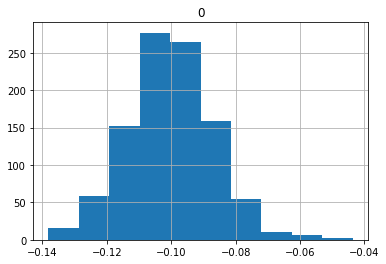

In [29]:
# Pred vs Real
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.02
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_real)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

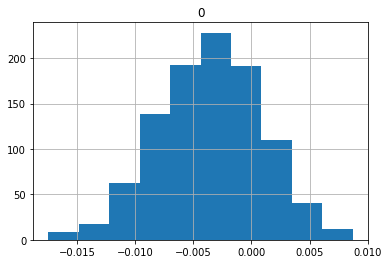

In [13]:
# Pred vs Percise
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.02
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_percise)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

In [14]:
"""

当前设置非常容易出现参数消失


找一种函数可以自动的大变小，小变大

"""

'\n\n很精确的\n\nLooks Good\n'

## Notes

https://app.yinxiang.com/shard/s18/nl/18934792/e81511f4-0b23-48bc-b627-22416bbf9554

In [ ]:
"""


"""